Interesting patterns of the original clf on friends below. Picture does matter A LOT. 

In [4]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [5]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


count    49.000000
mean      0.514627
std       0.140866
min       0.258019
25%       0.402962
50%       0.505931
75%       0.631985
max       0.836205
dtype: float64
skew --  0.13333521184059938
kurtosis -- -0.8401579842646298


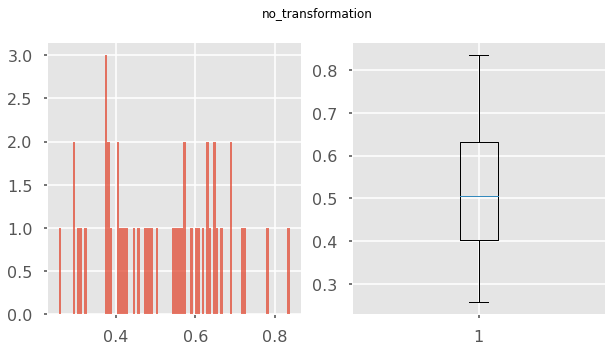

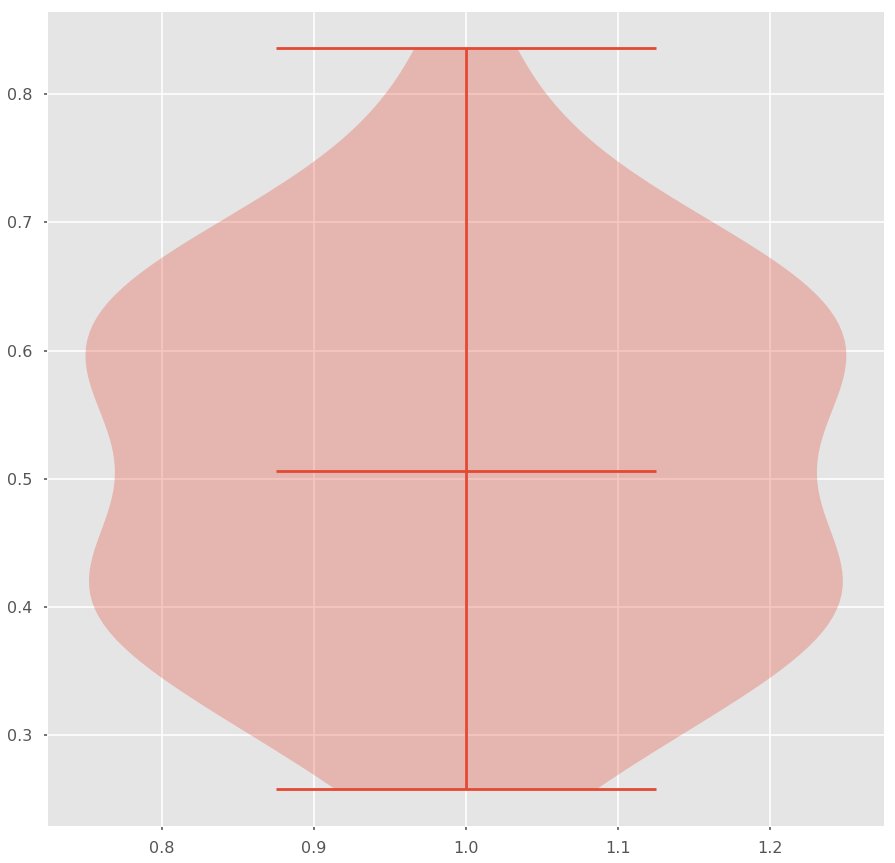

In [6]:
lr = joblib.load('rf_tinderlikes3.joblib')
probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [7]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
0


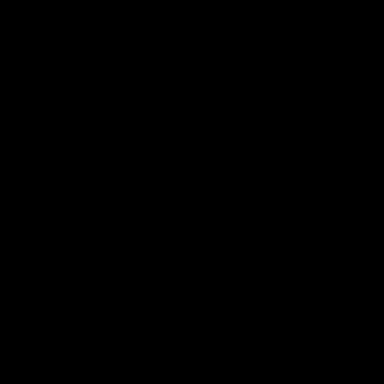

2
12


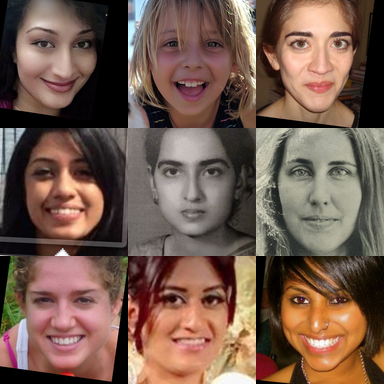

3
21


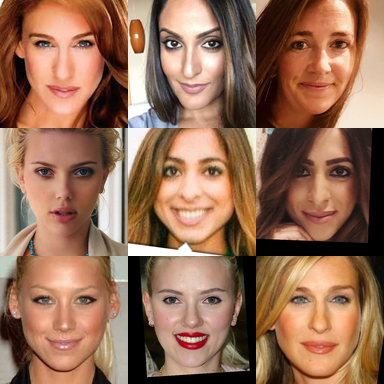

4
15


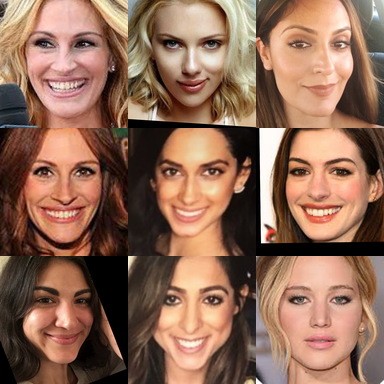

In [8]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
0


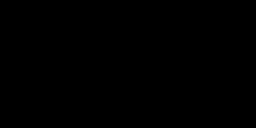

2
12


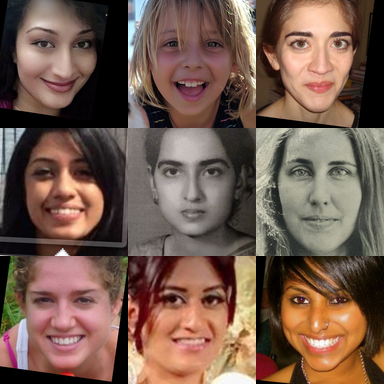

3
21


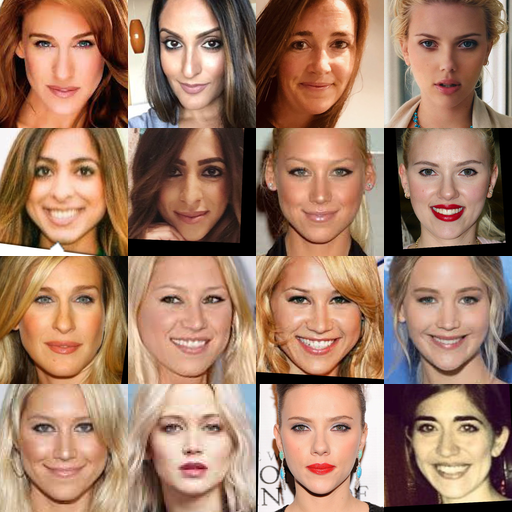

4
15


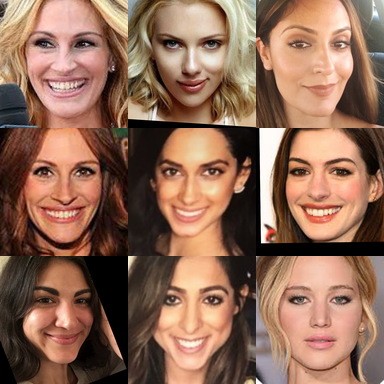

In [9]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


0.8362052902884797


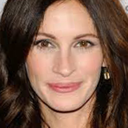

0.7793579271896338


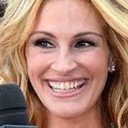

0.7249829063569178


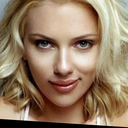

0.7191997632232464


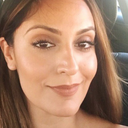

0.691397434697898


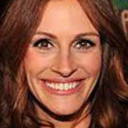

0.6902693062968815


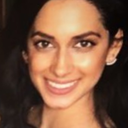

0.6650232379652269


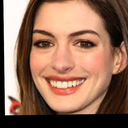

0.6544622017128102


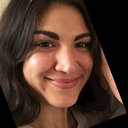

0.6488199700963425


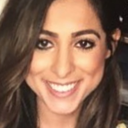

0.6462302768079055


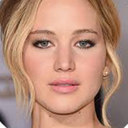

0.6383379261129628


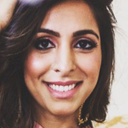

0.6335394912708411


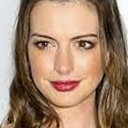

0.6319848768474482


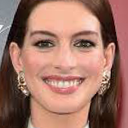

0.620357321196916


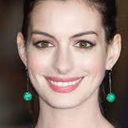

0.6100808888750923


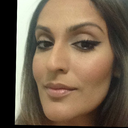

0.6009327951430323


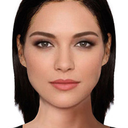

0.5904386528017324


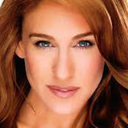

0.5738741669694838


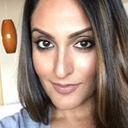

0.5735203998197427


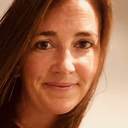

0.5690172969072136


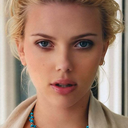

0.5615251532355645


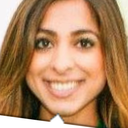

0.5533332422852488


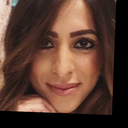

0.5474584654525165


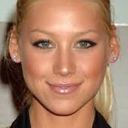

0.543221904917236


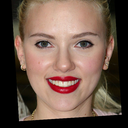

0.5059313916945105


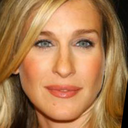

0.49035377707153527


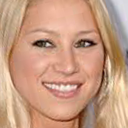

0.488965154025461


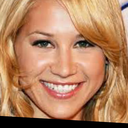

0.48278927606528055


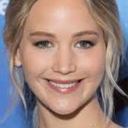

0.4735890203552718


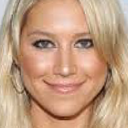

0.4596565648652897


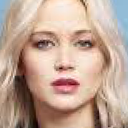

0.4453428634910796


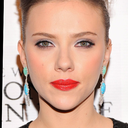

0.43043822877940047


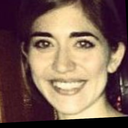

0.4201449981769441


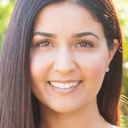

0.4171090822529926


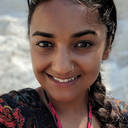

0.41170173815356625


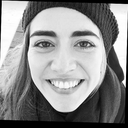

0.4049115274391374


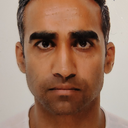

0.4029624882351762


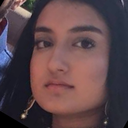

0.38992830607261664


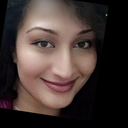

0.38382725261275363


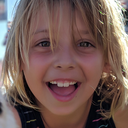

0.38069833776682394


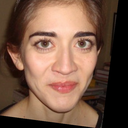

0.3786130946438137


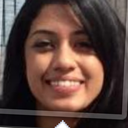

0.37419541250281485


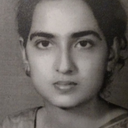

0.3740823007376466


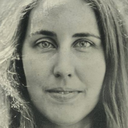

0.3257514559140263


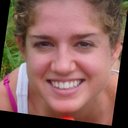

0.3126994560461995


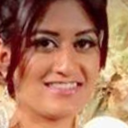

0.3098080564983563


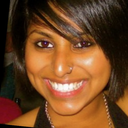

0.29703835644421117


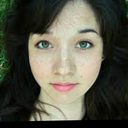

0.2945817834051682


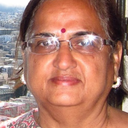

0.2580185263536652


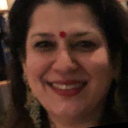

In [10]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    